### This Notebook is for testing purposes only. TESLA stock prediction model is taken from the following link

https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


df=pd.read_csv("/content/drive/MyDrive/Cryto_daily.csv")
print("Number of rows and columns:", df.shape)
df.head()

Number of rows and columns: (2949, 10)


,time,high,low,open,volumefrom,volumeto,close,conversionType,Datetime,Year
0,1388620800,886.21,810.47,815.94,12811.63,10826907.96,856.91,direct,2014-01-02,2014
1,1388707200,888.23,839.44,856.91,9709.01,8409629.11,884.26,direct,2014-01-03,2014
2,1388793600,932.16,848.32,884.26,14239.01,12784626.88,924.69,direct,2014-01-04,2014
3,1388880000,1029.86,911.36,924.69,21374.20,20789364.52,1014.74,direct,2014-01-05,2014
4,1388966400,1093.44,964.74,1014.74,23076.53,23622237.65,1012.65,direct,2014-01-06,2014


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# split the data into training and test sets

training_set = df[df['Year'] < 2021].iloc[:, 6:7].values
test_set = df[df['Year'] >= 2021].iloc[:, 6:7].values


# training_set = df.iloc[:2200, 6:7].values
# test_set = df.iloc[2200:, 6:7].values

In [ ]:
df[df['Year'] < 2021].iloc[:, 6:7]

,close
0,856.91
1,884.26
2,924.69
3,1014.74
4,1012.65
...,...
2551,26249.27
2552,27039.45
2553,27360.78
2554,28889.61


In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range(60, 2556):

    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [44]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
# model.add(Dropout(0.1))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.1))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.1))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 20, batch_size = 32, shuffle=False)

Epoch 1/20
78/78 [==============================] - 8s 53ms/step - loss: 0.0045
Epoch 2/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0059
Epoch 3/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0145
Epoch 4/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0102
Epoch 5/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0123
Epoch 6/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0155
Epoch 7/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0085
Epoch 8/20
78/78 [==============================] - 4s 54ms/step - loss: 0.0023
Epoch 9/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0085
Epoch 10/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0095
Epoch 11/20
78/78 [==============================] - 4s 53ms/step - loss: 0.0024
Epoch 12/20
78/78 [==============================] - 4s 57ms/step - loss: 6.4178e-04
Epoch 13/20
78/78 [==============

In [24]:
model.save('/content/drive/MyDrive/Crypto_Models/TM_5_daily_BTC_3L_100N_100N_50N_RS_TTF_0p1D_20epo_trainUpTo2021.h5')

In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Crypto_Models/Trained_model_2_daily_BTC_4L_50N_0p1D_trainUpTo2021.h5')

In [40]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:2556, 1:2]
dataset_test = df.iloc[2556:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = dummy.reshape(-1,1)
inputs_transformed = sc.transform(inputs)

X_test = []

for i in range(60, 453):
    X_test.append(inputs_transformed[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(393, 60, 1)


In [41]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price = model_loaded.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

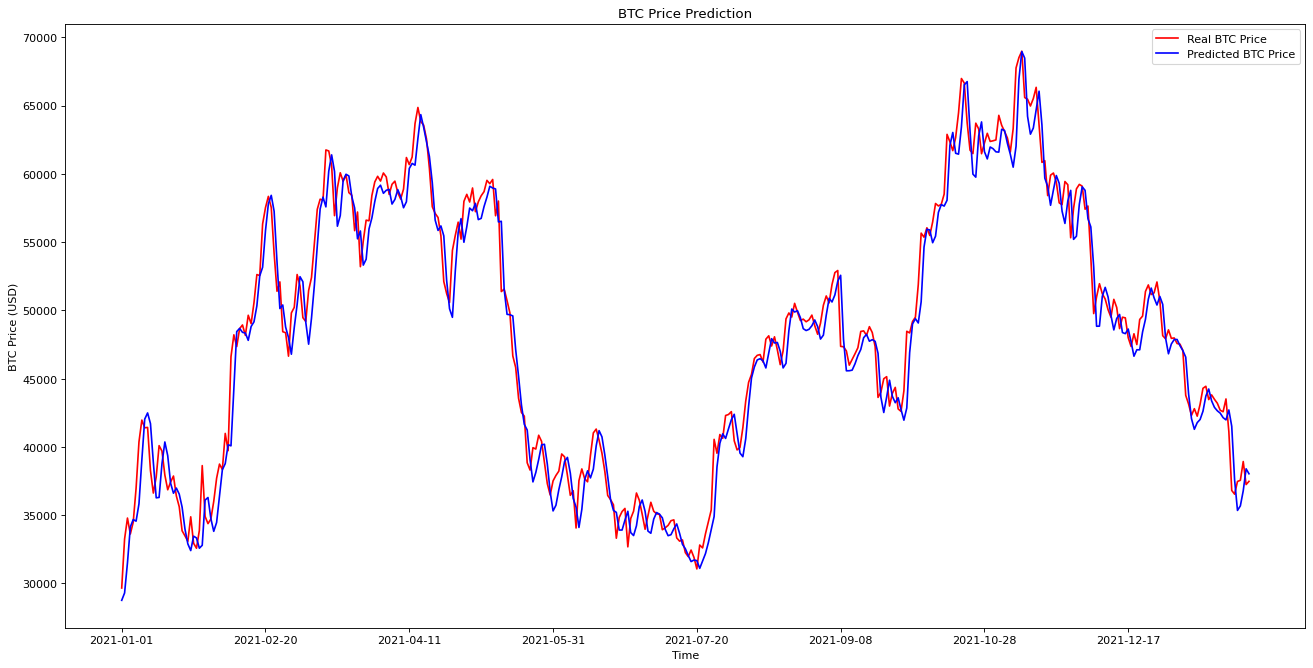

In [42]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

# Visualising the results
plt.plot(df.loc[2556:, 'Datetime'],dataset_test.values, color = 'red', label = 'Real BTC Price')
plt.plot(df.loc[2556:, 'Datetime'],predicted_stock_price[:,0], color = 'blue', label = 'Predicted BTC Price')
plt.xticks(np.arange(0,363,50))
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()

In [ ]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(dataset_test.values, predicted_stock_price[:,0].reshape(-1,1))
print('Test Score: %.2f MAE' % (testScoreMAE))

# dataset_test.values[:250]
# predicted_stock_price[:,0].reshape(-1,1)

Test Score: 3680.09 RMSE
Test Score: 2836.16 MAE


## Trial 2:

### Now I will attempt to use multiple features, instead of just closing price. Intiutivally, stock trading volume should have an impact on the prediction

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Cryto_daily.csv")
print("Number of rows and columns:", df.shape)
df.head()



Number of rows and columns: (2949, 10)


,time,high,low,open,volumefrom,volumeto,close,conversionType,Datetime,Year
0,1388620800,886.21,810.47,815.94,12811.63,10826907.96,856.91,direct,2014-01-02,2014
1,1388707200,888.23,839.44,856.91,9709.01,8409629.11,884.26,direct,2014-01-03,2014
2,1388793600,932.16,848.32,884.26,14239.01,12784626.88,924.69,direct,2014-01-04,2014
3,1388880000,1029.86,911.36,924.69,21374.20,20789364.52,1014.74,direct,2014-01-05,2014
4,1388966400,1093.44,964.74,1014.74,23076.53,23622237.65,1012.65,direct,2014-01-06,2014


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2949 entries, 0 to 2948
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2949 non-null   int64  
 1   high            2949 non-null   float64
 2   low             2949 non-null   float64
 3   open            2949 non-null   float64
 4   volumefrom      2949 non-null   float64
 5   volumeto        2949 non-null   float64
 6   close           2949 non-null   float64
 7   conversionType  2949 non-null   object 
 8   Datetime        2949 non-null   object 
 9   Year            2949 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 230.5+ KB


In [4]:
# create 20 and 50 day moving average columns
df['ma_20_day'] = df['close'].rolling(20, min_periods=1).mean()
df['ma_50_day'] = df['close'].rolling(50, min_periods=1).mean()

# create close price velocity and accelaration columns
df['close_velo'] = df['close'].diff()
df['close_acc'] = df['close_velo'].diff()

# drop first 50 rows so 50-day moving average column is accurate
df = df.iloc[50:, :]
df



,time,high,low,open,volumefrom,volumeto,close,conversionType,Datetime,Year,ma_20_day,ma_50_day,close_velo,close_acc
50,1392940800,160.15,91.66,111.92,82590.48,1.011592e+07,111.56,direct,2014-02-21,2014,542.1500,782.1980,-0.36,149.25
51,1393027200,290.59,96.72,111.56,72170.05,1.183823e+07,255.59,direct,2014-02-22,2014,507.2640,769.6246,144.03,144.39
52,1393113600,349.15,220.31,255.59,38549.76,1.115871e+07,310.17,direct,2014-02-23,2014,476.1870,757.3342,54.58,-89.45
53,1393200000,316.88,131.85,310.17,95118.82,1.792928e+07,174.00,direct,2014-02-24,2014,438.5550,740.5194,-136.17,-190.75
54,1393286400,174.64,102.33,174.00,30426.23,3.993024e+06,135.78,direct,2014-02-25,2014,400.1180,722.9820,-38.22,97.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1642982400,37469.19,32990.72,36288.15,94597.70,3.289035e+09,36702.79,direct,2022-01-24,2022,41174.1030,45470.8968,414.64,-797.59
2945,1643068800,37555.35,35732.05,36702.79,44562.17,1.632276e+09,36975.99,direct,2022-01-25,2022,40851.2770,45199.3600,273.20,-141.44
2946,1643155200,38930.36,36275.92,36975.99,57460.00,2.163384e+09,36829.37,direct,2022-01-26,2022,40538.0185,44923.2872,-146.62,-419.82
2947,1643241600,37242.79,35543.94,36829.37,46006.99,1.671119e+09,37189.85,direct,2022-01-27,2022,40320.3215,44656.8234,360.48,507.10


In [6]:
# split the data into training and test sets
total_dataset = df.iloc[:, [6,10,11,12,13]]
training_set = df[df['Year'] < 2021].iloc[:, [6,10,11,12,13]]
test_set = df[df['Year'] >= 2021].iloc[:, [6,10,11,12,13]]

total_dataset_array = total_dataset.values
training_set_array = training_set.values
test_set_array = test_set.values


In [7]:
total_dataset

,close,ma_20_day,ma_50_day,close_velo,close_acc
50,111.56,542.1500,782.1980,-0.36,149.25
51,255.59,507.2640,769.6246,144.03,144.39
52,310.17,476.1870,757.3342,54.58,-89.45
53,174.00,438.5550,740.5194,-136.17,-190.75
54,135.78,400.1180,722.9820,-38.22,97.95
...,...,...,...,...,...
2944,36702.79,41174.1030,45470.8968,414.64,-797.59
2945,36975.99,40851.2770,45199.3600,273.20,-141.44
2946,36829.37,40538.0185,44923.2872,-146.62,-419.82
2947,37189.85,40320.3215,44656.8234,360.48,507.10


In [53]:
# Creating the Training Data

# # MinMaxScaler is used to normalize the data
# scaler = MinMaxScaler(feature_range = (0, 1))

# # Train the Scaler with training data and smooth data
# smoothing_window_size = 500

# for di in range(0,10000,smoothing_window_size):

#     scaler.fit(train_data[di:di+smoothing_window_size,:])
#     train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])



# scaler = MinMaxScaler(feature_range = (0, 1))
scaler = StandardScaler()

scaler.fit(training_set_array)


training_data = scaler.transform(training_set_array)
training_data

X_train = [] 
Y_train = []

training_data.shape[0]

for i in range(30, training_data.shape[0]):

  X_train.append(training_data[i-30:i])
  Y_train.append(training_data[i,4])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

# scaler = MinMaxScaler(feature_range = (0, 1))

# training_set_scaled = scaler.fit_transform(training_set)

# X_train = []
# y_train = []

# for i in range(60, training_set.shape[0]):
    
#     X_train.append(training_set_scaled[i-60:i])
#     y_train.append(training_set_scaled[i,1])
    
# X_train, y_train = np.array(X_train), np.array(y_train)

# X_train.shape
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))


(2476, 30, 5)

(2446,)

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Feb  2 22:26:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# activation = 

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.1))

# # # # # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 80, return_sequences = True))
model.add(Dropout(0.1))

# # Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.1))

# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()
# Fitting the RNN to the Training set
# history = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, validation_split=0.1)

# Fitting the RNN to the Training set
model.fit(X_train, Y_train, epochs = 250, batch_size = 32)

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(loss))
# plt.figure()
# plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title("Training and Validation Loss")
# plt.legend()
# plt.show()

In [ ]:
# part_60_days = df[df['Year'] < 2021].iloc[:, [1,2,3,5,6]].tail(60)
# test_df= part_60_days.append(df[df['Year'] >= 2021].iloc[:, [1,2,3,5,6]], ignore_index = True)
# # test_df = test_df.drop(['Date', 'Adj Close'], axis = 1)
# test_df.head()

# df[df['Year'] < 2020].iloc[:, [4, 6]]

In [56]:
# Creating test set
# test_set

dataset_total = pd.concat((training_set, test_set), axis = 0)
dummy = dataset_total[len(dataset_total) - len(test_set) - 30:].values

inputs = dummy.reshape(-1,5)
inputs_transformed = scaler.transform(inputs)

X_test = []

for i in range(30, len(dataset_total) - len(training_set) + 30):
    X_test.append(inputs_transformed[i-30:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
print(X_test.shape)

# inputs = scaler.transform(test_set)

# X_test = []
# # Y_test = []

# for i in range (60, inputs.shape[0]):

#     X_test.append(inputs[i-60:i]) 
#     # Y_test.append(inputs[i, 1])


# X_test = np.array(X_test)
# X_test.shape


# X_test, Y_test = np.array(X_test), np.array(Y_test) 
# X_test.shape, Y_test.shape
# Y_pred = model.predict(X_test) 
# Y_pred, Y_test


# dataset_train = df.iloc[:2190, [4,6]]
# dataset_test = df.iloc[2190:, [4,6]]

# # dataset_total = df.iloc[:, [4,6]]
# dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
# dummy = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

# inputs = dummy.reshape(-1,2)
# inputs_transformed = scaler.transform(inputs)

# X_test = []

# for i in range(60, len(dataset_total) - len(training_set) + 60):
#     X_test.append(inputs_transformed[i-60:i, 0:2])
    
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
# print(X_test.shape)

(393, 30, 5)


In [63]:
import pickle
# save the scaler
pickle.dump(scaler, open('/content/drive/MyDrive/scaler_acc_8.pkl', 'wb'))

In [ ]:
# scaler.scale_

# scale = 1/(scaler.scale_[1])
# Y_test = Y_test*scale 
# Y_pred = Y_pred*scale
# Y_pred

In [ ]:
# plt.figure(figsize=(14,5))
# plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
# plt.plot(Y_pred[:,0], color = 'green', label = 'Predicted Bitcoin Price')
# plt.title('Bitcoin Price Prediction using RNN-LSTM')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [ ]:


# # # Get something which has as many features as dataset
# Y_test_unscaled_extended = np.zeros((len(Y_test),6))

# # # Put the predictions there
# Y_test_unscaled_extended[:,1] = Y_test

# # # Inverse transform it and select the 1st column.
# Y_test_unscaled = scaler.inverse_transform(Y_test_unscaled_extended)[:,1]
# Y_test_unscaled

In [ ]:
predicted_stock_price = model.predict(X_test)

# # Get something which has as many features as dataset
predicted_stock_price_extended = np.zeros((len(predicted_stock_price),5))

# # Put the predictions there
predicted_stock_price_extended[:,0] = predicted_stock_price[:,0]

# # Inverse transform it and select the 1st column.
predicted_stock_price = scaler.inverse_transform(predicted_stock_price_extended)[:,0]
predicted_stock_price

In [ ]:
predicted_stock_acc = model.predict(X_test)

# # Get something which has as many features as dataset
predicted_stock_acc_extended = np.zeros((len(predicted_stock_acc),5))

# # Put the predictions there
predicted_stock_acc_extended[:,4] = predicted_stock_acc[:,0]

# # Inverse transform it and select the 1st column.
predicted_stock_acc = scaler.inverse_transform(predicted_stock_acc_extended)[:,4]
predicted_stock_acc

In [ ]:
predicted_stock_velo = model.predict(X_test)

# # Get something which has as many features as dataset
predicted_stock_velo_extended = np.zeros((len(predicted_stock_velo),5))

# # Put the predictions there
predicted_stock_velo_extended[:,3] = predicted_stock_velo[:,0]

# # Inverse transform it and select the 1st column.
predicted_stock_velo = scaler.inverse_transform(predicted_stock_velo_extended)[:,3]
predicted_stock_velo

In [ ]:
(1/scaler.scale_[1])*predicted_stock_price[:,0]

In [24]:
window = len(df) - 60

window

len(df.iloc[window:, [13]])

60

<Figure size 1600x800 with 0 Axes>

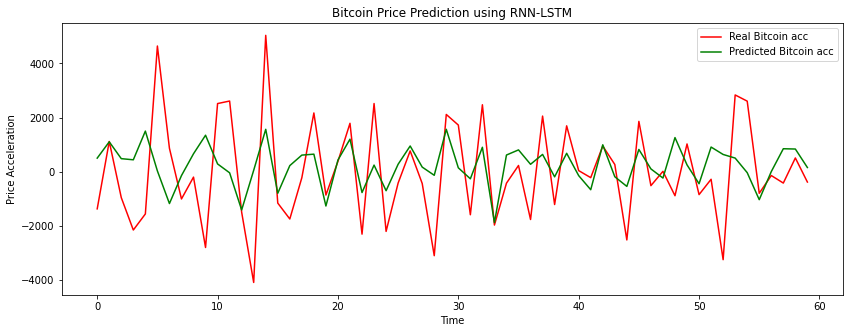

In [58]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

# len(df[df['Year']>2020]['Datetime'])

# len(dataset_test.values)

# Visualising the results
look_back = 60
window = len(df) - 60

# velocity
# plt.figure(figsize=(14,5))
# plt.plot(df.iloc[window:, [12]].values, color = 'red', label = 'Real Bitcoin velo')
# plt.plot(predicted_stock_velo[-look_back:], color = 'green', label = 'Predicted Bitcoin velo')
# plt.title('Bitcoin Price Prediction using RNN-LSTM')
# plt.xlabel('Time')
# plt.ylabel('Price Velocity')
# plt.legend()
# plt.show()

# # accel
plt.figure(figsize=(14,5))
plt.plot(df.iloc[window:, [13]].values, color = 'red', label = 'Real Bitcoin acc')
plt.plot(predicted_stock_acc[-look_back:], color = 'green', label = 'Predicted Bitcoin acc')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price Acceleration')
plt.legend()
plt.show()


# price
# plt.figure(figsize=(14,5))
# plt.plot(df.loc[2556:, 'close'].values, color = 'red', label = 'Real Bitcoin Price')
# plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Bitcoin Price')
# plt.title('Bitcoin Price Prediction using RNN-LSTM')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# plt.figure(figsize=(14,5))
# plt.plot(df.loc[:2556, 'close'].values, color = 'red', label = 'Real Bitcoin Price')
# plt.plot(np.pad(predicted_stock_price, (60,0), 'constant', constant_values=(0, 0)), color = 'green', label = 'Predicted Bitcoin Price')
# plt.title('Bitcoin Price Prediction using RNN-LSTM')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# plt.plot(df.loc[2556:, 'Datetime'],test_set['close'].values, color = 'red', label = 'Real BTC Stock Price')
# plt.plot(df.loc[2556:, 'Datetime'],predicted_stock_price, color = 'blue', label = 'Predicted BTC Stock Price')
# plt.xticks(np.arange(0,393,50))
# plt.title('BTC Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('BTC Stock Price')
# plt.legend()
# plt.show()

In [59]:
# Acceleration
test_set_pm = []
predictions_pm = []
accuracy_count = 0

for x in test_set['close_acc'].values:
  # print(x)
  if x < 0:
    test_set_pm.append(True)
  else:
    test_set_pm.append(False)
# print(test_set_pm)

for y in predicted_stock_acc:
  if y < 0:
    predictions_pm.append(True)
  else:
    predictions_pm.append(False)
# print(predictions_pm)


for i in range(len(test_set_pm)):
  if test_set_pm[i] == predictions_pm[i]:
    accuracy_count += 1

accuracy_score = accuracy_count/len(test_set_pm)
accuracy_score

0.712468193384224

In [51]:
# Velocity
test_set_pm = []
predictions_pm = []
accuracy_count = 0

for x in test_set['close_velo'].values:
  # print(x)
  if x < 0:
    test_set_pm.append(True)
  else:
    test_set_pm.append(False)
# print(test_set_pm)

for y in predicted_stock_velo:
  if y < 0:
    predictions_pm.append(True)
  else:
    predictions_pm.append(False)
# print(predictions_pm)


for i in range(len(test_set_pm)):
  if test_set_pm[i] == predictions_pm[i]:
    accuracy_count += 1

accuracy_score = accuracy_count/len(test_set_pm)
accuracy_score

0.48346055979643765

In [43]:
# calculate root mean squared error
testScoreRMSE = np.sqrt(mean_squared_error(test_set['close_acc'].values, predicted_stock_acc.reshape(-1,1)))
print('Test Score: %.2f RMSE' % (testScoreRMSE))

testScoreMAE = mean_absolute_error(test_set['close_acc'].values, predicted_stock_acc.reshape(-1,1))
print('Test Score: %.2f MSE' % (testScoreMAE))


Test Score: 2353.12 RMSE
Test Score: 1838.13 MSE


In [60]:
model.save('/content/drive/MyDrive/Crypto_Models/TM_8_daily_acc_BTC_SEEPIC_trainUpTo2021.h5')